<a href="https://colab.research.google.com/github/rifkiadhim/202055202019_R.Adhim/blob/master/DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt

In [9]:
import zipfile

In [10]:
dataset_zip = zipfile.ZipFile('drive/MyDrive/DeepLearning/Pokemon.zip', 'r')

dataset_zip.extractall()

dataset_zip.close()

This is the list of all the files present in the path given to us:

['forretress.png', 'pidgeot.png', 'meowstic-male.png', 'mantyke.png', 'stakataka.jpg', 'chansey.png', 'torterra.png', 'froslass.png', 'rufflet.png', 'excadrill.png', 'leavanny.png', 'primarina.jpg', 'dewgong.png', 'aurorus.png', 'ferrothorn.png', 'wigglytuff.png', 'meganium.png', 'ralts.png', 'huntail.png', 'scyther.png', 'buizel.png', 'gothita.png', 'crabominable.jpg', 'marshadow.jpg', 'nidorina.png', 'malamar.png', 'spinarak.png', 'cranidos.png', 'hitmonchan.png', 'lickilicky.png', 'misdreavus.png', 'weavile.png', 'gardevoir.png', 'golurk.png', 'greninja.png', 'munna.png', 'scraggy.png', 'celebi.png', 'cherubi.png', 'elgyem.png', 'braviary.png', 'raichu.png', 'beautifly.png', 'flygon.png', 'chikorita.png', 'bronzor.png', 'samurott.png', 'marowak.png', 'claydol.png', 'roggenrola.png', 'spiritomb.png', 'buneary.png', 'haunter.png', 'roselia.png', 'venomoth.png', 'azurill.png', 'larvitar.png', 'rattata.png', 'metagross.

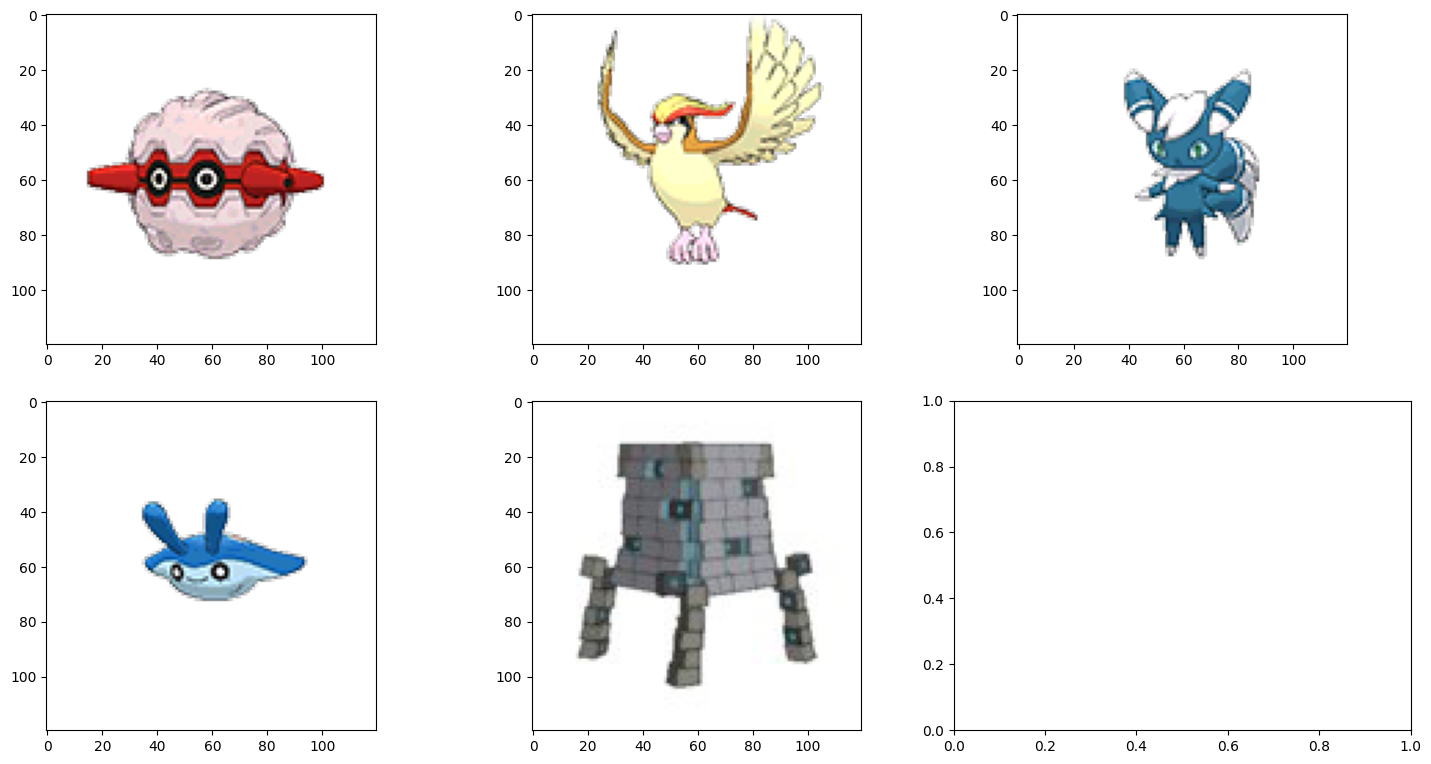

In [12]:
from PIL import Image

root_dir = "/content/images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)
print("This is the list of all the files present in the path given to us:\n")
print(File_names)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

def subplots():
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);
    
subplots()

In [16]:
data = pd.read_csv("/content/drive/MyDrive/DeepLearning/pokemon.csv")

data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [15]:
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [17]:
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [18]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [19]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 
    label = labels_idx[data_dict[file.split(".")[0]]] 
    final_images.append(np.array(img))
    final_labels.append(np.array(label))
    
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

In [20]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43200)             0         
                                                                 
 dense (Dense)               (None, 100)               4320100   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 18)                1818      
                                                                 
Total params: 4,342,118
Trainable params: 4,342,118
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(final_images, final_labels, epochs=50)

Epoch 1/50
26/26 [==============================] - 2s 42ms/step - loss: 3.6060 - accuracy: 0.1063
Epoch 2/50
26/26 [==============================] - 1s 40ms/step - loss: 2.8930 - accuracy: 0.1978
Epoch 3/50
26/26 [==============================] - 1s 56ms/step - loss: 2.5715 - accuracy: 0.2386
Epoch 4/50
26/26 [==============================] - 2s 62ms/step - loss: 2.4236 - accuracy: 0.2794
Epoch 5/50
26/26 [==============================] - 1s 40ms/step - loss: 2.2322 - accuracy: 0.3177
Epoch 6/50
26/26 [==============================] - 1s 38ms/step - loss: 2.1425 - accuracy: 0.3412
Epoch 7/50
26/26 [==============================] - 1s 36ms/step - loss: 1.9540 - accuracy: 0.3943
Epoch 8/50
26/26 [==============================] - 1s 37ms/step - loss: 1.7203 - accuracy: 0.4771
Epoch 9/50
26/26 [==============================] - 1s 37ms/step - loss: 1.5295 - accuracy: 0.5352
Epoch 10/50
26/26 [==============================] - 1s 36ms/step - loss: 1.2969 - accuracy: 0.6143
Epoch 11/

In [23]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)
print("\n",predictions[0])
id = np.argmax(predictions[0])
print("\nid that we got from the model as prediction: {}\nType of pokemon associted with that id: {} ".format(id,labels[id]))
print("accuracy of the model",history.history['accuracy'][-1])

26/26 [==============================] - 0s 12ms/step

 [2.3056197e-08 1.6909131e-07 1.6013724e-08 9.9979949e-01 4.0346554e-06
 1.4987218e-07 1.3829155e-07 9.4573558e-09 1.4926729e-10 2.3089345e-11
 3.4648340e-10 9.7172244e-09 1.9596228e-04 1.2126609e-12 3.0998021e-14
 1.4426723e-18 5.0319402e-09 5.3354797e-23]

id that we got from the model as prediction: 3
Type of pokemon associted with that id: Bug 
accuracy of the model 0.9035846590995789
